# **Heart Attack Prediction Project Problem**

---


Definition: To predict whether the patients does come heart attack or not

In [90]:
# pandas kütüphanesini veri manipülasyonu ve analizi için içe aktarma
import pandas as pd

# CSV dosyasını DataFrame'e yükleme
data_set = pd.read_csv("/Users/mehmetakkan/Documents/data-science-final-exam/heart.csv")

# DataFrame'in yapısını ve içeriğini anlamak için ilk beş satırı gösterme
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


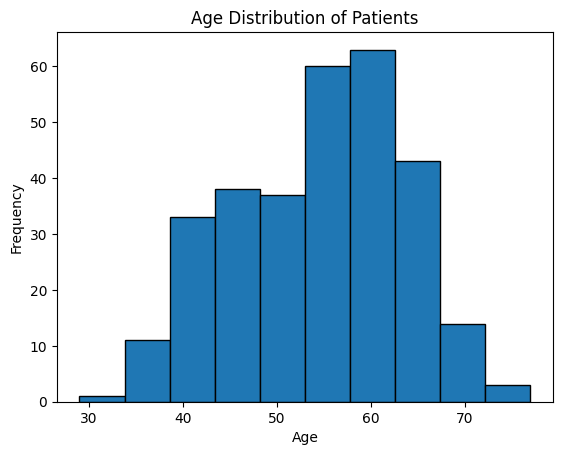

In [91]:
import matplotlib.pyplot as plt

plt.hist(data_set['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

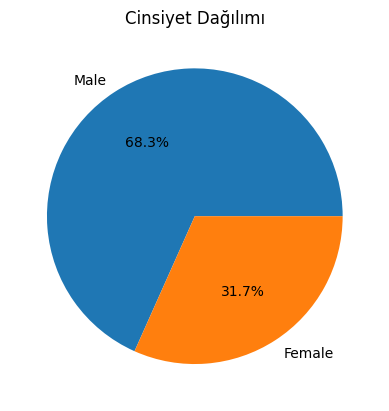

In [92]:
sex_count = data_set['sex'].value_counts()
labels = ['Male', 'Female']

plt.pie(sex_count, labels=labels, autopct='%1.1f%%')
plt.title('Cinsiyet Dağılımı')
plt.show()

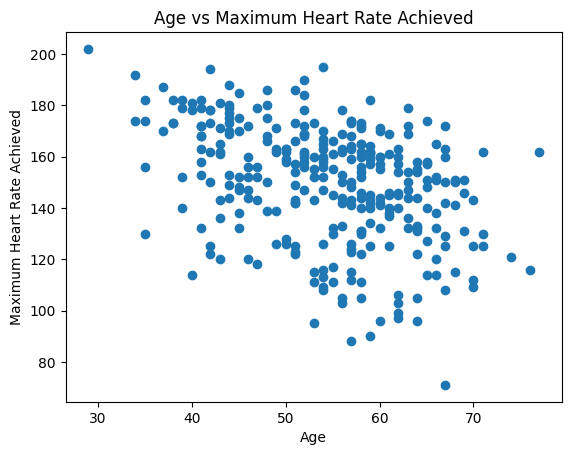

In [93]:
plt.scatter(data_set['age'], data_set['thalach'],)
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

In [94]:
# Veri setinde hangi özelliklerin bulunduğunu bilmek için DataFrame'in sütun isimlerini yazdırma
data_set.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Attribute Information**
*   1) age

*   2) sex

*   3) chest pain type (4 values)

*   4) resting blood pressure

*   5) serum cholestoral in mg/dl
*   6) fasting blood sugar > 120 mg/dl


*   7) resting electrocardiographic results (values 0,1,2)


*   8) maximum heart rate achieved



*   9) exercise induced angina

*   10) oldpeak = ST depression induced by exercise relative to rest
*   11) the slope of the peak exercise ST segment


*   12) number of major vessels (0-3) colored by flourosopy


*   13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


*   14) target: 0= less chance of heart attack 1= more chance of heart attack

In [95]:
# Eksik verileri kontrol etme
# Eksik değerlerin her sütun için ayrı ayrı sayısını gösteren bir tablo oluştur
missing_values = data_set.isnull().sum().to_frame().T
print("Eksik Değer Sayısı:")
print(missing_values)

print()
print(data_set.info())  # Veri seti hakkında genel bilgileri yazdırma

Eksik Değer Sayısı:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    0    0   0         0     0    0        0        0      0        0      0   

   ca  thal  target  
0   0     0       0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage:

Verisetinin her sütunu için sayım, ortalama, standart sapma, minimum değer, çeyrek değerler ve maksimum değerlerine bakalım. Bu bilgiler, veri analizinin ilk adımlarında oldukça faydalıdır ve verinin yapısını anlamaya yardımcı olur.







In [96]:
# DataFrame'in her sütunu için sayım, ortalama, standart sapma, minimum değer vb. istatistiksel detayları sağlama
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## **Veri Seti Bölme: Eğitim ve Test Setleri Oluşturma**

**Ayrıntılı Açıklama:**

1. **`train_test_split` Fonksiyonu:**
    - `sklearn.model_selection` modülünden `train_test_split` fonksiyonunu içe aktarıyoruz. Bu fonksiyon, veri setini rastgele eğitim ve test setlerine ayırmak için kullanılır.
2. **Hedef Değişken ve Özellik Matrisi Oluşturma:**
    - `data_set` veri setimizden `target` sütununu hedef değişken olarak ayırıyoruz ve `y` olarak adlandırıyoruz.
    - `target` sütunu hariç tüm sütunları içeren bir veri matrisi oluşturuyoruz ve `X` olarak adlandırıyoruz.
3. **Eğitim ve Test Seti Oranları:**
    - `train_test_split` fonksiyonunu kullanarak veri setini %80 eğitim seti ve %20 test seti olacak şekilde bölüyoruz.
    - `test_size` parametresi ile test setinin oranını belirliyoruz. Bu durumda oran 0.20, yani %20 olarak ayarlanmıştır.
    - `random_state` parametresi ile veri setinin rastgele bölünmesi için bir başlangıç değeri belirleyebiliriz. Bu durumda 0 değeri kullanılmıştır.
4. **Sonuç:**
    - Bu işlemin sonucunda, `X_train` ve `X_test` eğitim ve test setlerini, `y_train` ve `y_test` ise eğitim ve test setlerinin hedef değişkenlerini içeren veri matrisleri elde ederiz.


In [102]:
# Veri setini eğitim seti ve test seti olarak bölmek için train_test_split fonksiyonunu içe aktarma
from sklearn.model_selection import train_test_split

# 'target' sütununu hedef değişken 'y' olarak tanımlama ve 'target' hariç tüm sütunları içeren 'X' olarak tanımlama
y = data_set['target']
X = data_set.drop('target', axis=1)

# Veri setini %80 eğitim seti ve %20 test seti olarak bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## `collections.Counter` Modülü ile Veri Analizi

Bu kod bloğunda, `collections.Counter` modülünü kullanarak `y_test` ve `y_train` veri serilerindeki benzersiz değerleri ve bunların sayısını analiz ediyoruz.

**Ayrıntılı Açıklama:**

1. **`y_test.unique()` Fonksiyonu:**
    - `y_test` veri serisindeki **benzersiz değerleri** bir dizi halinde yazdırır.
    - Bir veri serisinde kaç farklı değer olduğunu ve bu değerlerin neler olduğunu gösterir.
2. **`Counter(y_train)`:**
    - `y_train` veri serisindeki **her bir benzersiz elemanın** **sayısını** hesaplar ve bir `Counter` nesnesi olarak döndürür.
    - Her bir değer kaç kez tekrarlandığını gösterir.
    - `Counter` nesnesi, bir sözlük (dict) benzeri bir yapıya sahiptir ve anahtarlar (keys) benzersiz değerleri, değerler (values) ise bu değerlerin sayısını temsil eder.

In [103]:
from collections import Counter

print(y_test.unique()) # y_test serisindeki benzersiz değerleri yazdırma
Counter(y_train) # y_train serisindeki benzersiz elemanların sayısını sayma

[0 1]


Counter({1: 131, 0: 111})

In [104]:
from sklearn.preprocessing import StandardScaler # StandartScaler ön işleme sınıfını içe aktarma

# Model performansını artırmak için eğitim verilerine uyan ve onu ortalama=0 & varyans=1 olacak şekilde dönüştüren scaler nesnesi oluşturma
scaler = StandardScaler()

# StandardScaler, her bir özelliği (feature), ortalama (mean) 0 ve standart sapma (std) 1 olacak şekilde ölçeklendirir.
# Bu, modelin tüm özellikleri eşit ağırlıkta değerlendirmesini sağlar ve modelin daha iyi performans göstermesine yardımcı olur.

# Eğitim verileri üzerinde StandardScaler'ı uygulama: fit_transform
# 'fit' adımı, veriler üzerindeki ortalama ve standart sapmayı hesaplar.
# 'transform' adımı, bu ortalama ve standart sapmayı kullanarak verileri ölçeklendirir.
X_train = scaler.fit_transform(X_train)

# Test verileri üzerinde StandardScaler'ı uygulama: transform
# Burada önemli olan, test verilerini dönüştürürken eğitim verilerinden hesaplanan ortalama ve standart sapmayı kullanmaktır.
# Bu, modelin eğitim sırasında gördüğü veri dağılımını temel alarak değerlendirmesini sağlar.
X_test = scaler.transform(X_test)

## Model Eğitimi ve Değerlendirme Detayları

Makine öğrenimi modellerinin eğitimi ve değerlendirilmesi, bir veri bilimi projesinin en kritik aşamalarındandır. Bu süreç, modelin veri üzerindeki öğrenme kapasitesini ve yeni verilere genelleme yeteneğini test eder.

### Model Eğitimi

- **Model Seçimi**: Bir makine öğrenimi projesinde doğru modelin seçilmesi son derece önemlidir. Çünkü her algoritmanın farklı güçlü ve zayıf yönleri vardır ve veri setinin yapısına ve problemin doğasına göre farklı performanslar gösterebilirler. Bu projede, çeşitli algoritmalar (`LogisticRegression`, `GaussianNB`, `RandomForestClassifier`, `XGBClassifier`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `SVC`) eğitilmiş ve uygun olan seçilmiştir.
- **Model Eğitimi (Fit)**: Her model, eğitim veri seti (`X_train`, `y_train`) kullanılarak eğitilir. Bu süreçte, model veri setindeki örüntüleri ve ilişkileri öğrenir.

### Model Değerlendirme

- **Confusion Matrix (Karışıklık Matrisi)**: Modelin tahminlerinin doğruluğunu görsel olarak değerlendirmek için kullanılır. Dört temel terim içerir: True Positive (TP), True Negative (TN), False Positive (FP), ve False Negative (FN).
- **Accuracy Score (Doğruluk Puanı)**: Modelin doğru tahminlerinin toplam tahminlere oranını ifade eder. $$ \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}} $$
- **Classification Report (Sınıflandırma Raporu)**: Precision (Kesinlik), Recall (Duyarlılık), F1-Score (F1-Skoru) ve destek (support) gibi metrikleri içerir. Bu metrikler, modelin performansını farklı açılardan değerlendirir:
  - **Precision**: Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. $$ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}} $$
  - **Recall**: Gerçek pozitif örneklerin ne kadarının doğru tahmin edildiğini gösterir. $$ \text{Recall} = \frac{\text{TP}}{\text{TP + FN}} $$
  - **F1-Score**: Precision ve Recall'un harmonik ortalamasıdır ve dengeli bir metriktir. $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} $$

Bu metrikler, modelin sadece genel başarısını değil, aynı zamanda sınıflar arasındaki performans dengesini de göz önünde bulundurur. Böylece, modelin gerçek dünya verilerine uygulanabilirliği ve güvenilirliği hakkında daha iyi bir fikir edinilir.


### **Logistic Regression**


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

m1 = 'Logistic Regression'

lr = LogisticRegression()  # LogisticRegression sınıfından bir model nesnesi oluşturuyoruz

lr.fit(X_train, y_train)  # Eğitim verilerini kullanarak modeli eğitiyoruz
lr_predicted = lr.predict(X_test)  # Eğitilmiş modeli kullanarak test verileri üzerinde tahminler yapıyoruz

lr_conf_matrix = confusion_matrix(y_test, lr_predicted)  # Tahminlerin gerçek sınıflarla karşılaştırıldığı karmaşıklık matrisini oluşturuyoruz
lr_acc_score = accuracy_score(y_test, lr_predicted)  # Modelin doğruluk skorunu hesaplıyoruz

print('Confusion Matrix:')
print(lr_conf_matrix)

print('\n')
print('Accuracy of Logistic Regression:', lr_acc_score*100, '\n')  # Logistic regresyon modelinin doğruluk skorunu yüzde olarak ekrana yazdırıyoruz
print(classification_report(y_test, lr_predicted))  # Gerçek y_test verileri ve tahmin edilen lr_predicted verileri ile sınıflandırma raporunu yazdır

Confusion Matrix:
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



### **Naive Bayes**

In [106]:
from sklearn.naive_bayes import GaussianNB

m2 = 'Naive Bayes'

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_predicted = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
nb_acc_score = accuracy_score(y_test, nb_predicted)

print("Confusion Matrix:")
print(nb_conf_matrix)

print("\n")
print("Accuracy of Naive Bayes model:", nb_acc_score*100, '\n')
print(classification_report(y_test, nb_predicted))


Confusion Matrix:
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



### **Random Forest**

---


`RandomForestClassifier`:
- `n_estimators=20`: Ormanda kullanılacak ağaç sayısını belirtir. Daha fazla ağaç, genellikle daha iyi performans anlamına gelir, çünkü her ağaç veriye farklı bir şekilde uyarlanır ve sonuçlarını birleştirir. Ancak, çok fazla ağaç eğitim süresini artırabilir ve modeli aşırı uyuma (overfitting) yatkın hale getirebilir. Genellikle 10 ile 100 arasında bir değer seçmek yaygındır.
- `random_state=12`: Modelin sonuçlarının tekrarlanabilirliğini sağlamak için kullanılır. Bu, modeli her çalıştırdığınızda aynı sonuçları almanızı sağlar. Eğer `random_state` belirtilmezse, her çalıştırmada farklı sonuçlar alabilirsiniz. Bu özellikle modelin geliştirilmesi ve hata ayıklaması için önemlidir.
- `max_depth=5`: Her bir ağacın maksimum derinliği. Karar ağaçları derinleştikçe, veriye daha fazla ayrıntıya inme yeteneğine sahip olur. Ancak, çok derin ağaçlar aşırı uyuma (overfitting) neden olabilir, yani eğitim verilerine çok fazla uyum sağlar ve genelleme yeteneğini kaybeder. `max_depth` ile ağaçların derinliği sınırlandırılarak bu aşırı uyum riski azaltılır. Burada 5 seçilmiş olması, her ağacın maksimum 5 seviye derinliğe sahip olacağı anlamına gelir.


In [107]:
from sklearn.ensemble import RandomForestClassifier

m3 = 'Random Forest Classifier'

rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)

rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix:")
print(rf_conf_matrix)

print("\n")
print("Accuracy of Random Forest:", rf_acc_score*100, '\n')
print(classification_report(y_test, rf_predicted))


Confusion Matrix:
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



### **Extreme Gradient Boosting (XGBoost)**

---


`XGBClassifier`:
- `learning_rate=0.01`: Her bir ağacın katkısını ölçmek için kullanılan öğrenme oranıdır. Düşük bir öğrenme oranı daha güvenilir sonuçlar sağlayabilir, ancak eğitim süresini uzatabilir. Yüksek bir öğrenme oranı daha hızlı öğrenme sağlar, ancak aşırı uyuma (overfitting) riskini artırabilir. Genellikle 0.01 ile 0.3 arasında bir değer seçmek yaygındır.
- `n_estimators=25`: Oluşturulacak olan ağaç sayısıdır. Daha fazla ağaç genellikle daha iyi performans sağlar, ancak eğitim süresini artırır. Bu değer çok büyükse, eğitim süresi artabilir ve model aşırı uyuma (overfitting) yatkın hale gelebilir.
- `max_depth=15`: Her bir karar ağacının maksimum derinliğini belirler. Daha derin ağaçlar daha karmaşık ilişkileri modelleyebilir, ancak aşırı uyuma (overfitting) eğilimli olabilir. Bu değer ağaçların ne kadar derinleşebileceğini kontrol eder. Genellikle 3 ile 10 arasında bir değer seçmek yaygındır.
- `gamma=0.6`: Ağaçların bölünme için minimum kayıp azalmasını kontrol eden bir parametredir. Bu değer ne kadar yüksekse, model daha az eğilimli olacaktır. Bu, ağacın daha az önemsiz bölünmeler yapmasını sağlar.
- `subsample=0.52`: Eğitim veri setinin bir alt örneğini (örneklem) alırken kullanılan orandır. Bu, her ağaç için rastgele alt örneklem seçmek ve aşırı uyumu (overfitting) azaltmak için kullanılır.
- `colsample_bytree=0.6`: Her bir ağaç oluşturulurken kullanılacak olan özelliklerin oranıdır. Bu, her ağaç için rastgele özelliklerin bir alt kümesini seçmek için kullanılır. Bu, modelin çeşitliliğini artırabilir ve aşırı uyumu (overfitting) azaltabilir.
- `seed=27`: Rastgele sayı üreteci için başlangıç değeri. Bu, modelin sonuçlarının tekrarlanabilirliğini sağlar.
- `reg_lambda=2`: L2 düzenleme terimi (Ridge regresyonu) için bir katsayıdır. Bu, aşırı uyumu (overfitting) kontrol etmek için kullanılır.
- `booster='dart'`: Kullanılacak olan artırıcı türüdür. "gbtree", "gblinear" veya "dart" olabilir. "gbtree" ve "gblinear" XGBoost'un ağaç ve lineer modelini temsil ederken, "dart" ağaçları rastgele bırakan bir artırıcıdır.
- `colsample_bylevel=0.6`: Her seviyede özelliklerin bir alt kümesini seçmek için kullanılır. Bu, ağaçların çeşitliliğini artırabilir ve aşırı uyumu (overfitting) azaltabilir.
- `colsample_bynode=0.5`: Her düğümde özelliklerin bir alt kümesini seçmek için kullanılır. Bu, ağaçların çeşitliliğini artırabilir ve aşırı uyumu (overfitting) azaltabilir.


In [108]:
from xgboost import XGBClassifier

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)

xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("Confusion Matrix:")
print(xgb_conf_matrix)

print("\n")
print("Accuracy of Extreme Gradient Boost:", xgb_acc_score*100, '\n')
print(classification_report(y_test, xgb_predicted))

Confusion Matrix:
[[13 14]
 [ 1 33]]


Accuracy of Extreme Gradient Boost: 75.40983606557377 

              precision    recall  f1-score   support

           0       0.93      0.48      0.63        27
           1       0.70      0.97      0.81        34

    accuracy                           0.75        61
   macro avg       0.82      0.73      0.72        61
weighted avg       0.80      0.75      0.73        61



### **K-Nearest Neighbors (KNN)**

---


`KNeighborsClassifier`:
- `n_neighbors=10`: Tahmin etmek için kullanılacak olan komşu sayısıdır. KNN algoritması, tahmin etmek için veri setindeki her bir noktanın en yakın k komşusunu kullanır. Bu değer ne kadar büyükse, modelin karmaşıklığı artar ve aşırı uyuma (overfitting) eğilimli olabilir. Ancak, çok küçük bir değer seçmek, modelin aşırı uyuma (overfitting) eğilimli olmasını önleyebilir.


In [109]:
from sklearn.neighbors import KNeighborsClassifier

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("Confusion Matrix:")
print(knn_conf_matrix)

print("\n")
print("Accuracy of K-NeighborsClassifier:", knn_acc_score*100, '\n')
print(classification_report(y_test, knn_predicted))

Confusion Matrix:
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Decision Tree**

---


`DecisionTreeClassifier`
- `criterion='entropy'`: Bu parametre, karar ağacının bölünme ölçütünü belirler. 'entropy', bölünmelerin veri kümesinin homojenliğini artırmasını sağlayarak bilgi kazancını maksimize eder.

- `random_state=0`: Modelin tekrarlanabilirliğini sağlamak için rastgele sayı üretecinin başlangıç değeridir. Bu sayede her çalıştırmada aynı sonuçları elde edebiliriz.

- `max_depth=6`: Karar ağacının maksimum derinliğini belirler. Bu parametre ile modelin karmaşıklığını ve eğitim verilerine uyumunu kontrol edebiliriz. `max_depth` değeri, aşırı uyuma (overfitting) riskini azaltmak için kullanılır.


In [110]:
from sklearn.tree import DecisionTreeClassifier

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)

dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("Confusion Matrix:")
print(dt_conf_matrix)

print("\n")
print("Accuracy of DecisionTreeClassifier:", dt_acc_score*100, '\n')
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### **Support Vector Classifier (SVC)**

---


`SVC`

- `kernel='rbf'`: Bu parametre, SVM'in kullanacağı çekirdek fonksiyonunu belirler. 'rbf' (Radial Basis Function), veri noktalarını yüksek boyutlu bir uzayda görselleştirerek, doğrusal olmayan ilişkileri modellemek için idealdir.

- `C=2`: Bu, hata terimine uygulanacak düzenleme parametresidir. C'nin değeri, modelin eğitim verilerine uyum sağlama yeteneği ile aykırı değerlere tolerans gösterme arasındaki dengeyi belirler.



In [111]:
from sklearn.svm import SVC

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2, probability=True)
svc.fit(X_train, y_train)

svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("Confusion Matrix:")
print(svc_conf_matrix)

print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score*100, '\n')
print(classification_report(y_test, svc_predicted))

Confusion Matrix:
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### **Model Evaluation**

---

Hangi modelin veri kümemiz üzerinde en iyi sonuçları verdiğini belirlemek ve en uygun modeli seçmek için modelimizin doğruluk değerlerinden oluşan bir DataFrame oluşturalım.



In [112]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'K-Nearest Neighbors',
                                     'Decision Tree', 'Support Vector Machine'], 'Accuracy': [lr_acc_score*100, nb_acc_score*100,
                                                                                              rf_acc_score*100, xgb_acc_score*100,
                                                                                              knn_acc_score*100, dt_acc_score*100,
                                                                                              svc_acc_score*100]})
model_eval

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,86.885246
3,XGBoost,75.409836
4,K-Nearest Neighbors,88.524590
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590


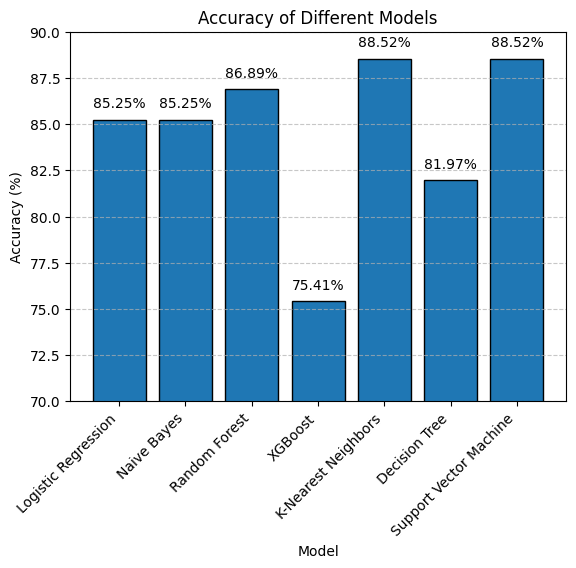

In [118]:
# Model isimleri ve doğruluk oranları
models = model_eval['Model']
accuracy = model_eval['Accuracy']

# Çubuk grafik oluştur
plt.bar(models, accuracy, edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(70, 90)  # Y eksenini 70 ile 90 arasında sınırla
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y eksenine göre ızgarayı ekle

# Çubukların üzerinde değerleri göster
for i in range(len(models)):
    plt.text(i, accuracy[i] + 0.5, f'{accuracy[i]:.2f}%', ha='center', va='bottom')

plt.show()

## **Stacking Classifier**

---



`StackingCVClassifier`, farklı makine öğrenimi modellerinin tahminlerini birleştirerek daha güçlü bir model oluşturmayı amaçlar. Bizim projemizde, `xgb` (XGBoost), `knn` (K-En Yakın Komşu) ve `svc` (Destek Vektör Makinesi) sınıflandırıcıları kullanılmış ve `svc` meta-sınıflandırıcı olarak belirlenmiştir.

**Not:** Her bir modelin farklı güçlü yönlerinden faydalanarak ve hatalarını dengeleyerek daha güvenilir tahminler elde edilmesini amaçlıyoruz.

### Temel Amacı

#### Modelin Performansını İyileştirmek
`StackingCVClassifier`, farklı özelliklere sahip sınıflandırıcıların tahminlerini birleştirerek, tek bir modelin performansını artırmayı amaçlar. Bu, farklı sınıflandırıcıların güçlü yanlarını bir araya getirerek, genellikle daha iyi bir genelleme yeteneği sağlar.

#### Modelin Dayanıklılığını Artırmak
Farklı sınıflandırıcılar farklı şekillerde çalışır ve farklı türde hatalar yapabilir. `StackingCVClassifier`, bu farklılıkları dengeleyerek, daha sağlam ve dayanıklı bir model oluşturmayı hedefler.

#### Aşırı Uyum Riskini Azaltmak
Tek bir model yerine birden fazla modelin birleştirilmesi, aşırı uyuma (overfitting) eğilimi azaltabilir. `StackingCVClassifier`, temel sınıflandırıcıların tahminlerini birleştirirken, aşırı uyum riskini azaltmaya yardımcı olabilir.

In [119]:
from mlxtend.classifier import StackingCVClassifier

scv = StackingCVClassifier(classifiers=[xgb,knn,svc], meta_classifier= svc, random_state=42)
scv.fit(X_train,y_train)

scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)


print("Confusion Matrix:")
print(scv_conf_matrix)

print("\n")
print("Accuracy of StackingCVClassifier:", scv_acc_score*100, '\n')
print(classification_report(y_test, scv_predicted))

Confusion Matrix:
[[24  3]
 [ 5 29]]


Accuracy of StackingCVClassifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## **Precision-Recall Curve**

---

Her bir model için hassasiyet ve geri çağırma değerlerini hesaplayalım. Bu fonksiyon, sınıflandırma modellerinin performansını değerlendirmek için hassasiyet-recall eğrilerini oluşturur.
- **Precision**: Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. (Doğru pozitiflerin tüm pozitif tahminlere oranıdır) $$ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}} $$
- **Recall**: Gerçek pozitif örneklerin ne kadarının doğru tahmin edildiğini gösterir. (Doğru pozitiflerin tüm gerçek pozitiflere oranıdır.) $$ \text{Recall} = \frac{\text{TP}}{\text{TP + FN}} $$



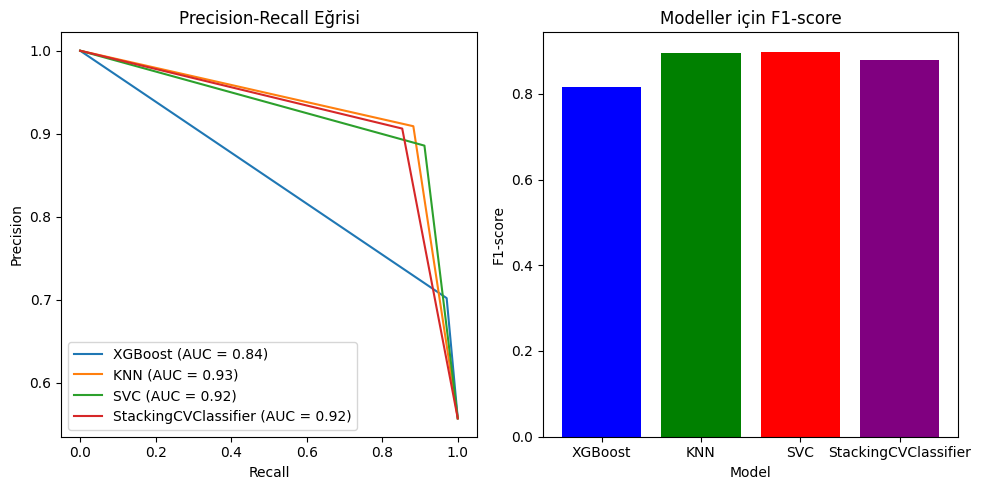

In [120]:
from sklearn.metrics import f1_score, auc, precision_recall_curve

# Precision-Recall eğrilerini hesapla
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_predicted)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_predicted)
precision_svc, recall_svc, _ = precision_recall_curve(y_test, svc_predicted)
precision_scv, recall_scv, _ = precision_recall_curve(y_test, scv_predicted)

# Her model için F1-score'u hesapla
f1_xgb = f1_score(y_test, xgb_predicted)
f1_knn = f1_score(y_test, knn_predicted)
f1_svc = f1_score(y_test, svc_predicted)
f1_scv = f1_score(y_test, scv_predicted)

# Her model için AUC değerini hesapla
auc_xgb = auc(recall_xgb, precision_xgb)
auc_knn = auc(recall_knn, precision_knn)
auc_svc = auc(recall_svc, precision_svc)
auc_scv = auc(recall_scv, precision_scv)

# Precision-Recall eğrilerini AUC değerleriyle birlikte göster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(recall_svc, precision_svc, label=f'SVC (AUC = {auc_svc:.2f})')
plt.plot(recall_scv, precision_scv, label=f'StackingCVClassifier (AUC = {auc_scv:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Eğrisi')
plt.legend()

# F1-score'ları göstermek için çubuk grafik oluştur
plt.subplot(1, 2, 2)
modeller = ['XGBoost', 'KNN', 'SVC', 'StackingCVClassifier']
f1_skorları = [f1_xgb, f1_knn, f1_svc, f1_scv]
plt.bar(modeller, f1_skorları, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('Modeller için F1-score')

plt.tight_layout()
plt.show()

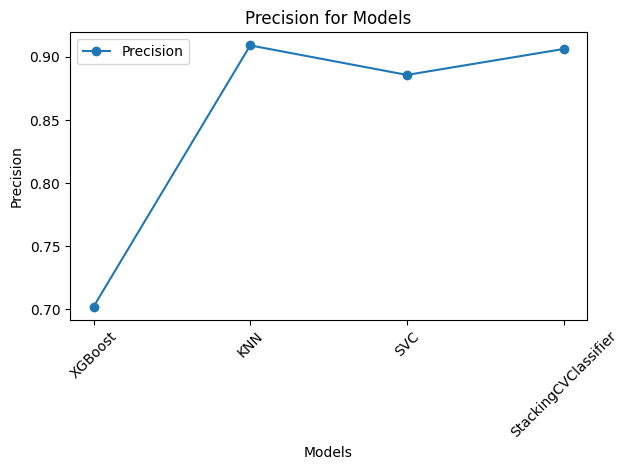

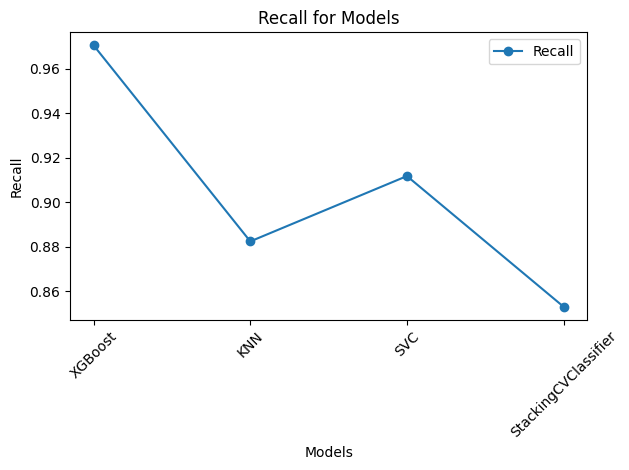

In [121]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each model
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_predicted)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_predicted)
precision_svc, recall_svc, _ = precision_recall_curve(y_test, svc_predicted)
precision_scv, recall_scv, _ = precision_recall_curve(y_test, scv_predicted)

# Plot precision for all models
plt.plot(['XGBoost', 'KNN', 'SVC', 'StackingCVClassifier'],
         [precision_xgb[-2], precision_knn[-2], precision_svc[-2], precision_scv[-2]],
         marker='o', label='Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision for Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot recall for all models
plt.plot(['XGBoost', 'KNN', 'SVC', 'StackingCVClassifier'],
         [recall_xgb[-2], recall_knn[-2], recall_svc[-2], recall_scv[-2]],
         marker='o', label='Recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall for Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## **Interactive Heart Disease Prediction**

---

Daha önce `StackingCVClassifier` modeli ile farklı sınıflandırıcıların tahminlerini bir araya getirmiştik. Şimdi kullanıcıdan alınan sağlık verilerine dayanarak kalp hastalığı olasılığını tahmin edelim.








Based on the input, there is a 78.11% chance of heart disease.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


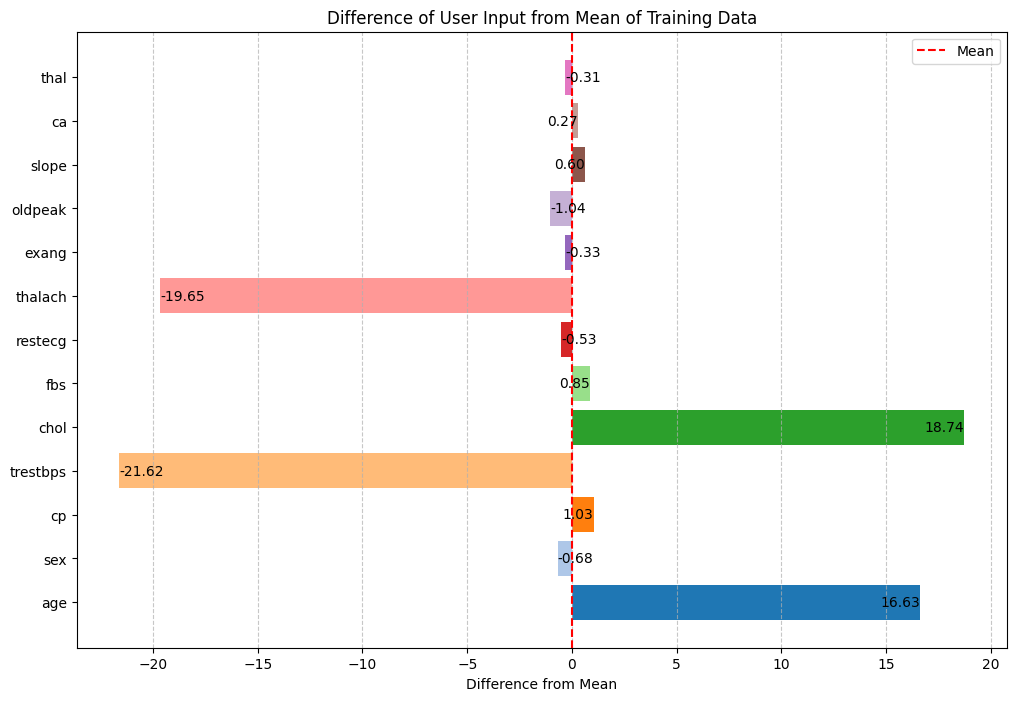

In [122]:
import numpy as np


# Function to get user input and predict heart disease with probability
def predict_heart_disease():
    # Get user inputs
    age = float(input("Enter age: "))
    sex = float(input("Enter sex (0 for female, 1 for male): "))
    cp = float(input("Enter chest pain type (0-3): "))
    trestbps = float(input("Enter resting blood pressure: "))
    chol = float(input("Enter serum cholesterol level: "))
    fbs = float(input("Enter fasting blood sugar (0 for False, 1 for True): "))
    restecg = float(input("Enter resting electrocardiographic results (0-2): "))
    thalach = float(input("Enter maximum heart rate achieved: "))
    exang = float(input("Enter exercise-induced angina (0 for No, 1 for Yes): "))
    oldpeak = float(input("Enter ST depression induced by exercise: "))
    slope = float(input("Enter the slope of the peak exercise ST segment (0-2): "))
    ca = float(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
    thal = float(input("Enter thalassemia type (0-3): "))

    # Prepare the input data for prediction
    user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    user_data_scaled = scaler.transform(user_data) # eğitim verileri ile aynı ölçeklendirme işlemlerine tabi tutulması

    prediction_proba = scv.predict_proba(user_data_scaled)[0, 1] # Sınıf 1 (kalp hastalığı) olasılığını al

    # Display the result with probability
    if prediction_proba > 0.5:
        print(f"Based on the input, there is a {prediction_proba * 100:.2f}% chance of heart disease.")
    else:
        print(f"Based on the input, there is a {100 - prediction_proba * 100:.2f}% chance of no significant heart disease.")

    # Eğitim verilerinin ortalama ve standart sapmalarını hesaplayın
    education_data_mean = X.mean(axis=0).to_numpy()
    education_data_std = X.std(axis=0).to_numpy()

    # Kullanıcı verilerini eğitim verilerinin ortalama ve std sapmalarıyla karşılaştır
    user_data_normalized = (user_data - education_data_mean) / education_data_std

    # Özellik adlarını dinamik olarak çek
    feature_names = X.columns

    # Her bir özellik için grafik oluştur
    differences = user_data[0] - education_data_mean

    colors = plt.cm.tab20.colors  # 20 farklı renk al
    plt.figure(figsize=(12, 8))
    bars = plt.barh(feature_names, differences, color=colors[:len(feature_names)])
    plt.axvline(x=0, color='r', linestyle='--', label='Mean')
    plt.xlabel('Difference from Mean')
    plt.title('Difference of User Input from Mean of Training Data')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Değerleri çubukların ucuna ekle
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2,
                 f'{width:.2f}', ha='left' if width < 0 else 'right', va='center')

    plt.show()

# Call the function to predict heart disease based on user input
predict_heart_disease()